## Root Mean Square voxel velocity

Until now I have been using the mean $|v|$ of individual galaxies in the search of finding a function $f(\delta_g)=v$. However, using the root mean square (RMS) velocity may be better suited for comparing to observations.

Calculating the RMS velocity is a relatively simple proces, $$v_{RMS} = \sqrt{\frac{1}{N}\sum_i v_i^2},$$ where $\sum_i$ sums over all galaxies in a voxel. Calculating the error on this velocity, $\sigma_{v_{RMS}}$, is somewhat harder. Since $v_{RMS}^2$ traces $v^2$, the variance on $v_{RMS}^2$ is calculated by$$Var(v^2)=\mathbb{E}[v^4]+\mathbb{E}^2[v^2].$$ The error on $v_{RMS}$ then follows as$$\sigma_{v_{RMS}}=\sqrt{Var(v_{RMS})}=\sqrt{\sqrt{Var(v^2)}}=\sqrt[4]{\mathbb{E}[v^4]+\mathbb{E}^2[v^2]}$$

In [1]:
import my_functions as mf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
dmo = mf.LoadSimulation('/net/hydra/data2/quinten/data/dmo_fiducial/SOAP-HBT/halo_properties_0077.hdf5')
dmo.selext_galaxies_mass_threshold([1e11, np.inf])
dmo.load_all(128)

Mass range: 11.0 - inf
Galaxies: 7009562


/data2/quinten/.venv4/lib64/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a**0.0 at a=1.0) for all arguments.
  warnings.warn(
/data2/quinten/.venv4/lib64/python3.12/site-packages/swiftsimio/_array_functions.py:430: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a**0.0 at a=1.0) for all arguments.
  warnings.warn(
/data2/quinten/MRP/scripts/my_functions.py:102: RuntimeWarning: invalid value encountered in divide
  self.voxel_velocity = np.sqrt(voxel_velocity_sum_of_squares / voxel_count)
/data2/quinten/.venv4/lib64/python3.12/site-packages/swiftsimio/_array_functions.py:665: RuntimeWarning: Mixing arguments with and without cosmo_factors, continuing assuming provided cosmo_factor (a at a=1.0) for all arguments.
  warnings.warn(
/data2/quinten/MRP/scripts/my_functions.py:113: RuntimeWarning: invalid value 

Working with voxel velocities contains two sources of errors: the errors within voxels which are derived above, the intra-voxel errors, and the errors between voxels, the inter-voxel errors. The intra-voxel errors within an overdensity bin are stacked together as$$\sigma_{v,intra}=\frac{\sqrt{\frac{1}{M}\sum_i\sigma_{v_{RMS}}^2}}{\sqrt{M-1}},$$where M is the number of voxels in an overdensity bin. The inter-voxel error is calculated by simply calculating the error on the mean voxel velocity in an overdensity bin. The total error within an overdensity bin is then$$\sigma_v^2=\sigma_{intra}^2+\sigma_{inter}^2.$$Note that splitting the error is two terms results in an error of infinity for voxels containing only one galaxy and number density bins containing only one voxel, since their intra-voxel and inter-voxel errors are 0, respectively.

In [3]:
vv = mf.VoxelVelocity(dmo.number_density, dmo.mean_galaxy_number_density, dmo.voxel_velocity[0], dmo.voxel_velocity_err[0])
bin_centers, v_binned, v_binned_err, (binned_err_intra, binned_err_inter) = mf.bin_voxel_velocity(vv)

/data2/quinten/MRP/scripts/my_functions.py:192: RuntimeWarning: Mean of empty slice
  bin_centers = [np.nanmean(values[bin_number == bin_numbers]) for bin_number in range(len(bin_edges)-1)]
/data2/quinten/MRP/scripts/my_functions.py:468: RuntimeWarning: invalid value encountered in divide
  v_binned = np.histogram(delta_g+1, bin_edges, weights=v)[0] / count
/data2/quinten/MRP/scripts/my_functions.py:423: RuntimeWarning: invalid value encountered in sqrt
  binned_err_inter = binned_std_inter / np.sqrt(count-1)
/data2/quinten/MRP/scripts/my_functions.py:423: RuntimeWarning: invalid value encountered in divide
  binned_err_inter = binned_std_inter / np.sqrt(count-1)
/data2/quinten/MRP/scripts/my_functions.py:429: RuntimeWarning: invalid value encountered in divide
  binned_err_intra = np.sqrt(binned_err_intra_sum_of_squares/count) / np.sqrt(count-1)
/data2/quinten/MRP/scripts/my_functions.py:429: RuntimeWarning: invalid value encountered in sqrt
  binned_err_intra = np.sqrt(binned_err_int

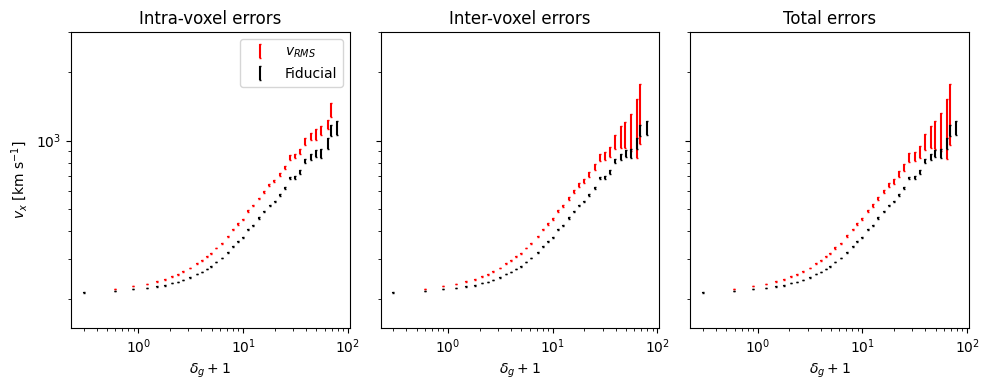

In [4]:
fig, ax = plt.subplots(1, 3, figsize=[10,4], sharey=True)

ax[0].errorbar(bin_centers, v_binned, binned_err_intra, linestyle='', fmt='', capsize=1, label='$v_{RMS}$', c='r')
ax[0].set(
   ylabel='$v_x$ [km s$^{-1}$]',
   title='Intra-voxel errors',
)

ax[1].errorbar(bin_centers, v_binned, binned_err_inter, linestyle='', fmt='', capsize=1, c='r')
ax[1].set(
   title='Inter-voxel errors',
)

ax[2].errorbar(bin_centers, v_binned, v_binned_err, linestyle='', fmt='', capsize=1, c='r')
ax[2].set(
   title='Total errors',
)

for axis in ax:
    mf.plot_galaxy_overdensity(axis, dmo.number_density_per_galaxy, dmo.mean_galaxy_number_density, dmo.vp[:, 0], label='Fiducial')
    axis.set(
        xscale='log', 
        yscale='log',
        ylim=[150,3e3],
        xlabel='$\\delta_g+1$',
    )
ax[0].legend()

fig.tight_layout()
plt.show()

The inter-voxel errors generally outweigh the intra-voxel errors.